In [135]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [3]:
data_rings3_train = pd.read_csv("dane_nn5/rings3-regular-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn5/rings3-regular-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_rings5_train = pd.read_csv("dane_nn5/rings5-regular-training.csv")
X_rings5_train = data_rings5_train[['x', 'y']].values.reshape(-1, 2)
y_rings5_train = data_rings5_train['c'].values.reshape(-1, 1)

data_rings5_test = pd.read_csv("dane_nn5/rings5-regular-test.csv")
X_rings5_test = data_rings5_test[['x', 'y']].values.reshape(-1, 2)
y_rings5_test = data_rings5_test['c'].values.reshape(-1, 1)

data_multimodal_train = pd.read_csv("dane_nn5/multimodal-large-training.csv")
X_multimodal_train = data_multimodal_train[['x']].values.reshape(-1, 1) 
y_multimodal_train = data_multimodal_train['y'].values.reshape(-1, 1)

data_multimodal_test = pd.read_csv("dane_nn5/multimodal-large-test.csv")
X_multimodal_test = data_multimodal_test[['x']].values.reshape(-1, 1)
y_multimodal_test = data_multimodal_test['y'].values.reshape(-1, 1)

data_steps_train = pd.read_csv("dane_nn5/steps-large-training.csv")
X_steps_train = data_steps_train[['x']].values.reshape(-1, 1)
y_steps_train = data_steps_train['y'].values.reshape(-1, 1)

data_steps_test = pd.read_csv("dane_nn5/steps-large-test.csv")
X_steps_test = data_steps_test[['x']].values.reshape(-1, 1)
y_steps_test = data_steps_test['y'].values.reshape(-1, 1)


In [51]:
def activations_comparison(X_test, y_test, model_linear, model_sigmoid, model_tanh, model_relu, log_scale=False):

    y_linear_loss = np.mean((y_test - model_linear.predict(X_test)) ** 2)
    y_sigmoid_loss = np.mean((y_test - model_sigmoid.predict(X_test)) ** 2)
    y_tanh_loss = np.mean((y_test - model_tanh.predict(X_test)) ** 2)
    y_relu_loss = np.mean((y_test - model_relu.predict(X_test)) ** 2)

    print(f"Loss for linear activation: {y_linear_loss:.2f}")
    print(f"Loss for sigmoid activation: {y_sigmoid_loss:.2f}")
    print(f"Loss for tanh activation: {y_tanh_loss:.2f}")
    print(f"Loss for relu activation: {y_relu_loss:.2f}")

    lh_linear = model_linear.model_history()
    lh_sigmoid = model_sigmoid.model_history()
    lh_tanh = model_tanh.model_history()
    lh_relu = model_relu.model_history()


    plt.figure(figsize=(15, 5))
    plt.plot(lh_linear, label='linear')
    plt.plot(lh_sigmoid, label='sigmoid')
    plt.plot(lh_tanh, label='tanh')
    plt.plot(lh_relu, label='relu')
    plt.title('Loss over time (1 hidden layer)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if log_scale:
        plt.yscale('log')
    plt.legend()
    plt.show()     

In [89]:
def plot_classification_results(X_test, y_test, y_pred, title='Classification Results'):
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    
    # Identify misclassified points
    misclassified = y_pred != y_test
    
    # Plot correctly classified points
    scatter = plt.scatter(X_test[~misclassified, 0], X_test[~misclassified, 1], 
                          c=y_test[~misclassified], cmap='viridis')
    
    # Plot misclassified points
    plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1],
                color='red', marker='x', s=100, 
                label='Misclassified')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

# Multimodal large dataset

### 1 hidden layer

In [29]:
nn_mult1_linear = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 96, 1],
                   activation_fun="linear", output_activation="linear", loss_fun="mse")
nn_mult1_sigmoid = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 96, 1],
                   activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_mult1_tanh = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 96, 1],
                              activation_fun="tanh", output_activation="linear", loss_fun="mse")
nn_mult1_relu = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 96, 1],
                     activation_fun="relu", output_activation="linear", loss_fun="mse")

In [30]:
nn_mult1_linear.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
         mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult1_sigmoid.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
         mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult1_tanh.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
         mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult1_relu.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
         mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)

Starting loss: 5361.61


Training: 100%|████████████████████████████████████████████████████████████████████| 2000/2000 [00:21<00:00] , Loss:  Current:4436.5384,Best:4433.5711



Training complete. Final loss: 4433.5711
Starting loss: 5394.52


Training: 100%|████████████████████████████████████████████████████████████████████| 2000/2000 [01:04<00:00] , Loss:  Current:2098.7278,Best:2072.8826



Training complete. Final loss: 2072.8826
Starting loss: 5356.09


Training: 100%|████████████████████████████████████████████████████████████████████| 2000/2000 [00:54<00:00] , Loss:  Current:2363.7246,Best:2305.0658



Training complete. Final loss: 2305.0658
Starting loss: 5350.64


Training: 100%|████████████████████████████████████████████████████████████████████| 2000/2000 [00:27<00:00] , Loss:  Current:2354.8278,Best:2341.4992


Training complete. Final loss: 2341.4992


Loss for linear activation: 4433.57
Loss for sigmoid activation: 2072.88
Loss for tanh activation: 2305.07
Loss for relu activation: 2341.50


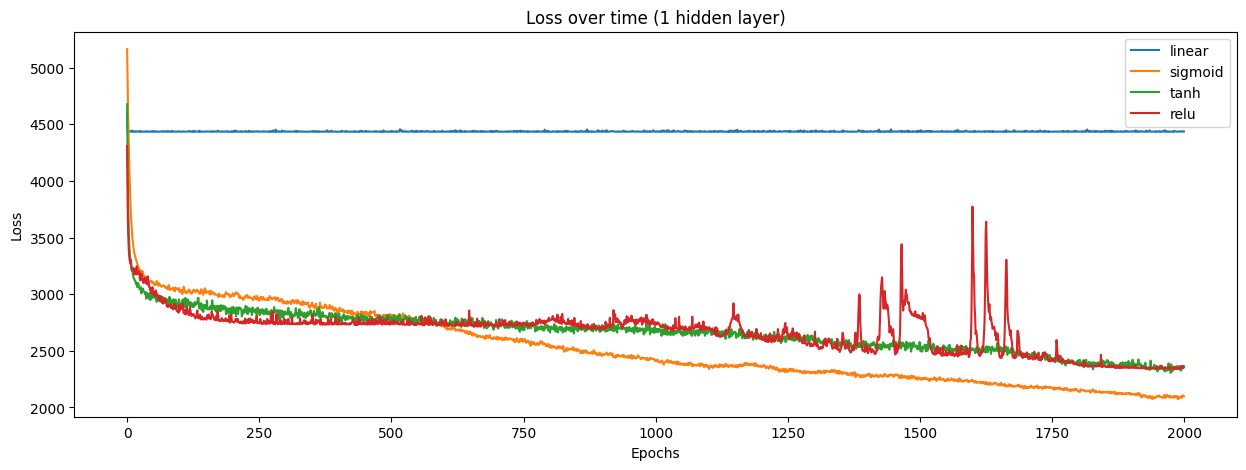

In [52]:
activations_comparison(X_multimodal_test, y_multimodal_test, nn_mult1_linear, nn_mult1_sigmoid, nn_mult1_tanh, nn_mult1_relu)

### 2 hidden layers

In [34]:
nn_mult2_linear = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 48, 48, 1],
                     activation_fun="linear", output_activation="linear", loss_fun="mse")
nn_mult2_sigmoid = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 48, 48, 1],
                        activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_mult2_tanh = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 48, 48, 1],
                                activation_fun="tanh", output_activation="linear", loss_fun="mse")
nn_mult2_relu = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 48, 48, 1],
                        activation_fun="relu", output_activation="linear", loss_fun="mse")

In [35]:
nn_mult2_linear.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult2_sigmoid.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult2_tanh.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult2_relu.train(epochs=int(2000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)

Starting loss: 5358.76


Training: 100%|████████████████████████████████████████████████████████████████████| 2000/2000 [00:33<00:00] , Loss:  Current:4442.8199,Best:4433.5725



Training complete. Final loss: 4433.5725
Starting loss: 5346.43


Training: 100%|████████████████████████████████████████████████████████████████████████| 2000/2000 [01:20<00:00] , Loss:  Current:86.7149,Best:86.7149



Training complete. Final loss: 86.7149
Starting loss: 5356.13


Training: 100%|████████████████████████████████████████████████████████████████████████| 2000/2000 [01:08<00:00] , Loss:  Current: 3.2924,Best: 2.4803



Training complete. Final loss: 2.4803
Starting loss: 5377.36


Training: 100%|██████████████████████████████████████████████████████████████████████| 2000/2000 [00:41<00:00] , Loss:  Current:152.4819,Best:130.6052


Training complete. Final loss: 130.6052


Loss for linear activation: 4433.57
Loss for sigmoid activation: 86.71
Loss for tanh activation: 2.48
Loss for relu activation: 130.61


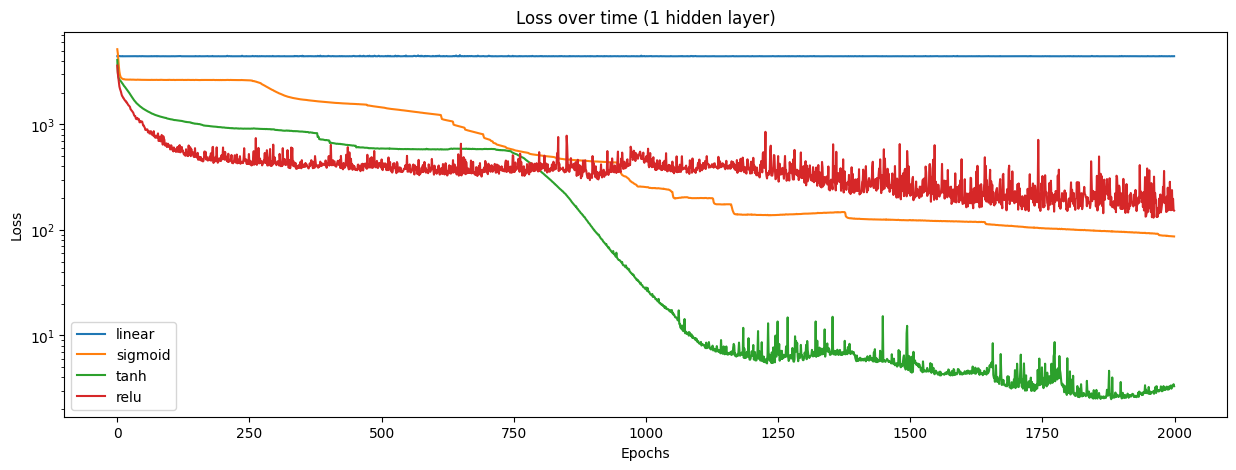

In [54]:
activations_comparison(X_multimodal_test, y_multimodal_test, nn_mult2_linear, nn_mult2_sigmoid, nn_mult2_tanh, nn_mult2_relu, log_scale=True)

### 3 hidden layers

In [ ]:
nn_mult3_linear = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 32, 32, 1],
                     activation_fun="linear", output_activation="linear", loss_fun="mse")
nn_mult3_sigmoid = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 32, 32, 1],
                        activation_fun="sigmoid", output_activation="linear", loss_fun="mse")
nn_mult3_tanh = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 32, 32, 1],
                                activation_fun="tanh", output_activation="linear", loss_fun="mse")
nn_mult3_relu = NeuralNetwork(X_multimodal_train, y_multimodal_train, [1, 32, 32, 32, 1],
                        activation_fun="relu", output_activation="linear", loss_fun="mse")

In [ ]:
nn_mult3_linear.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult3_sigmoid.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult3_tanh.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_mult3_relu.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_multimodal_test, y_multimodal_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)

Starting loss: 5345.06


Training: 100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00] , Loss:  Current:4445.1329,Best:4433.5718



Training complete. Final loss: 4433.5718
Starting loss: 5341.24


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00] , Loss:  Current: 2.5645,Best: 2.2827



Training complete. Final loss: 2.2827
Starting loss: 5374.96


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00] , Loss:  Current: 5.4055,Best: 2.1971



Training complete. Final loss: 2.1971
Starting loss: 5342.97


Training: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00] , Loss:  Current:364.6926,Best:164.8312


Training complete. Final loss: 164.8312


Loss for linear activation: 4433.57
Loss for sigmoid activation: 2.28
Loss for tanh activation: 2.20
Loss for relu activation: 142.34


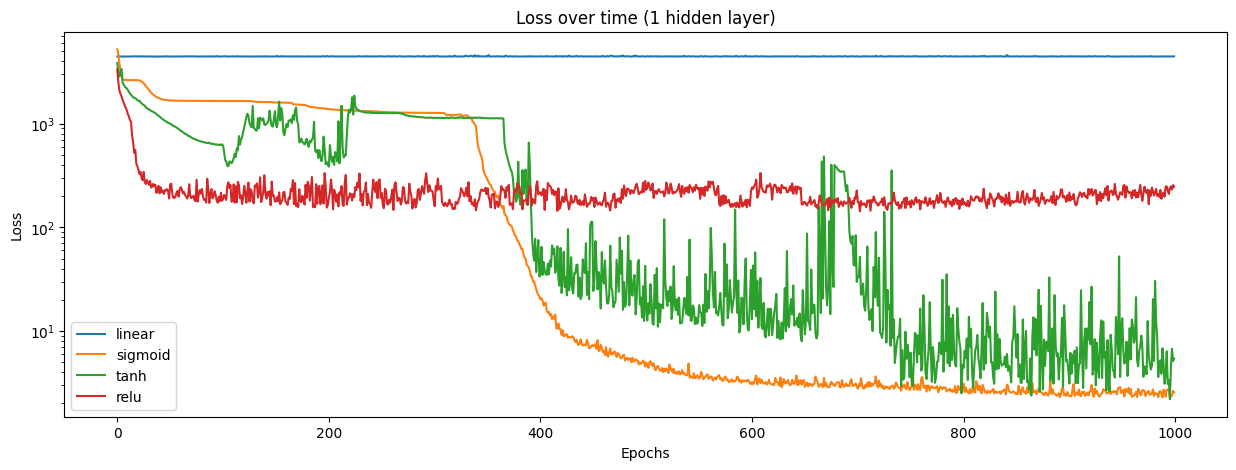

In [72]:
activations_comparison(X_multimodal_test, y_multimodal_test, nn_mult3_linear, nn_mult3_sigmoid, nn_mult3_tanh, nn_mult3_relu, log_scale=True)

# Training other datasets on best 2 and 3 hidden layers networks

## Steps large dataset

In [84]:
nn_steps_best2 = NeuralNetwork(X_steps_train, y_steps_train, [1, 48, 48, 1],
                                activation_fun="tanh", output_activation="linear", loss_fun="mse")
nn_steps_best3 = NeuralNetwork(X_steps_train, y_steps_train, [1, 32, 32, 32, 1],
                        activation_fun="sigmoid", output_activation="linear", loss_fun="mse")

nn_steps_best2.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_steps_test, y_steps_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)
nn_steps_best3.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_steps_test, y_steps_test),
            mini_batch=True, batch_size=100, optimization="momentum", momentum=0.7, stop_condition=0.1)


Starting loss: 7304.15


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00] , Loss:  Current:21.4686,Best:10.1818



Training complete. Final loss: 10.1818
Starting loss: 7407.47


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00] , Loss:  Current:14.5147,Best: 7.7730


Training complete. Final loss: 7.7730


Loss for 2 hidden layers with tanh: 10.18
Loss for 3 hidden layers with sigmoid: 7.77


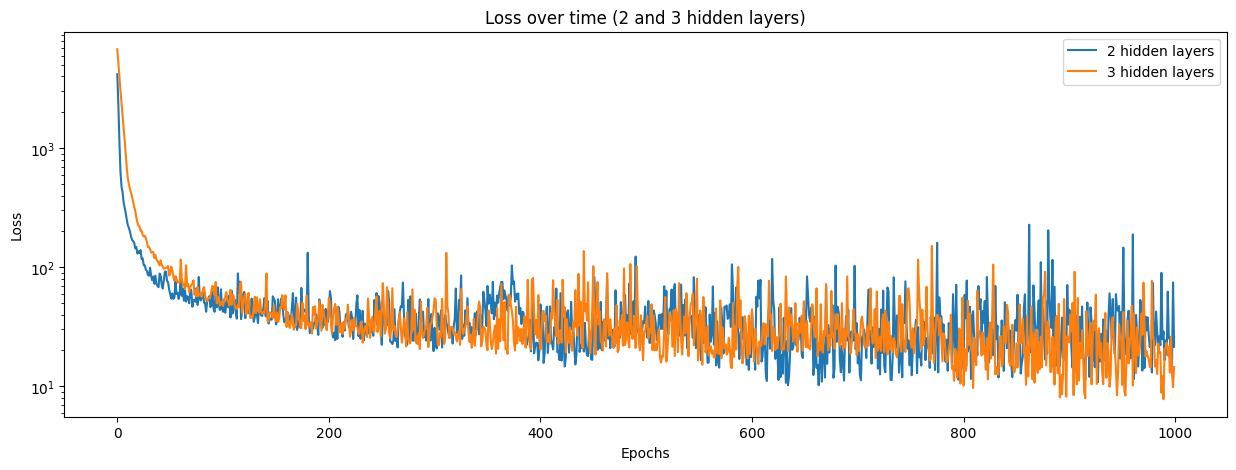

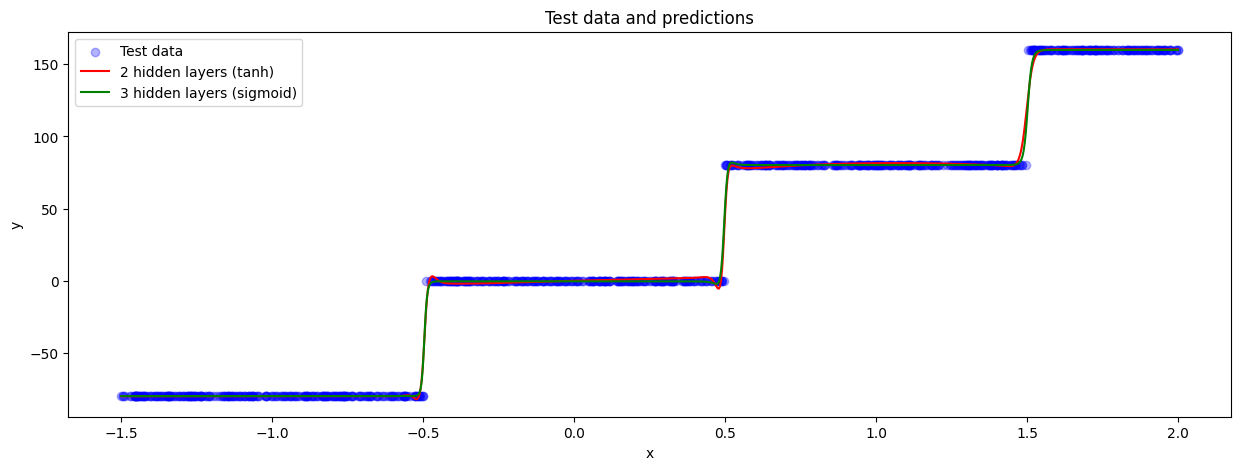

In [86]:
y_loss2 = np.mean((y_steps_test - nn_steps_best2.predict(X_steps_test)) ** 2)
y_loss3 = np.mean((y_steps_test - nn_steps_best3.predict(X_steps_test)) ** 2)
print(f"Loss for 2 hidden layers with tanh: {y_loss2:.2f}")
print(f"Loss for 3 hidden layers with sigmoid: {y_loss3:.2f}")

plt.figure(figsize=(15, 5))
plt.plot(nn_steps_best2.model_history(), label='2 hidden layers')
plt.plot(nn_steps_best3.model_history(), label='3 hidden layers')
plt.title('Loss over time (2 and 3 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

x = np.linspace(np.min(X_steps_test), np.max(X_steps_test), 1000).reshape(-1, 1)

plt.figure(figsize=(15, 5))
plt.scatter(X_steps_test, y_steps_test, color='blue', alpha=0.3, label='Test data')
plt.plot(x, nn_steps_best2.predict(x), color='red', label='2 hidden layers (tanh)')
plt.plot(x, nn_steps_best3.predict(x), color='green', label='3 hidden layers (sigmoid)')
plt.title('Test data and predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Rings3 dataset

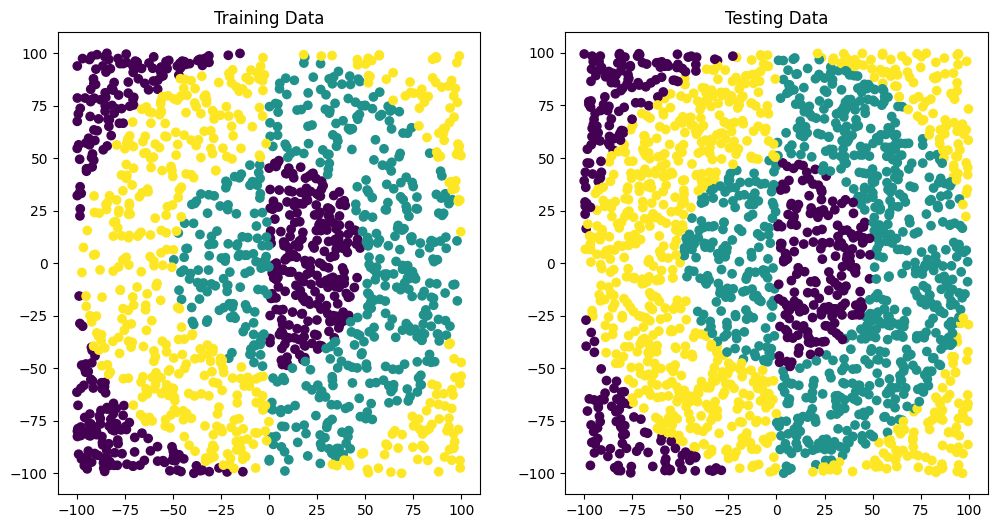

In [116]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_rings3_train[:, 0], X_rings3_train[:, 1], c=y_rings3_train.ravel(), cmap='viridis')
plt.title('Training Data')
plt.subplot(1, 2, 2)
plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_rings3_test.ravel(), cmap='viridis')
plt.title('Testing Data')
plt.show()

In [103]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]

nn_rings3_best2 = NeuralNetwork(X_rings3_train, y_rings3_train, [input_size, 32, 32, output_size],
                                activation_fun="tanh", output_activation="softmax", loss_fun="crossentropy")
nn_rings3_best3 = NeuralNetwork(X_rings3_train, y_rings3_train, [input_size, 32, 32, 32, output_size],
                                activation_fun="sigmoid", output_activation="softmax", loss_fun="crossentropy")

In [104]:
nn_rings3_best2.train(epochs=int(500), learning_rate=0.001, validation_data=(X_rings3_test, y_rings3_test),
            mini_batch=True, batch_size=32, optimization="rmsprop", momentum=0, stop_condition=0)
nn_rings3_best2.train(epochs=int(500), learning_rate=0.0001, validation_data=(X_rings3_test, y_rings3_test),
            mini_batch=True, batch_size=16, optimization="rmsprop", momentum=0, stop_condition=0)

Starting loss: 1.66


Training: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00] , Loss:  Current: 0.1616,Best: 0.1616



Training complete. Final loss: 0.1616
Starting loss: 0.14


Training: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00] , Loss:  Current: 0.1427,Best: 0.1398


Training complete. Final loss: 0.1398


In [105]:
nn_rings3_best3.train(epochs=int(500), learning_rate=0.001, validation_data=(X_rings3_test, y_rings3_test),
            mini_batch=True, batch_size=32, optimization="rmsprop", momentum=0, stop_condition=0)
nn_rings3_best3.train(epochs=int(500), learning_rate=0.0001, validation_data=(X_rings3_test, y_rings3_test),
            mini_batch=True, batch_size=16, optimization="rmsprop", momentum=0, stop_condition=0)

Starting loss: 1.23


Training: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00] , Loss:  Current: 0.1218,Best: 0.1054



Training complete. Final loss: 0.1054
Starting loss: 0.10


Training: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:14<00:00] , Loss:  Current: 0.0924,Best: 0.0869


Training complete. Final loss: 0.0869


Accuracy for 2 hidden layers with tanh: 0.9455
F1 score for 2 hidden layers with tanh: 0.9454

Accuracy for 3 hidden layers with sigmoid: 0.9675
F1 score for 3 hidden layers with sigmoid: 0.9675


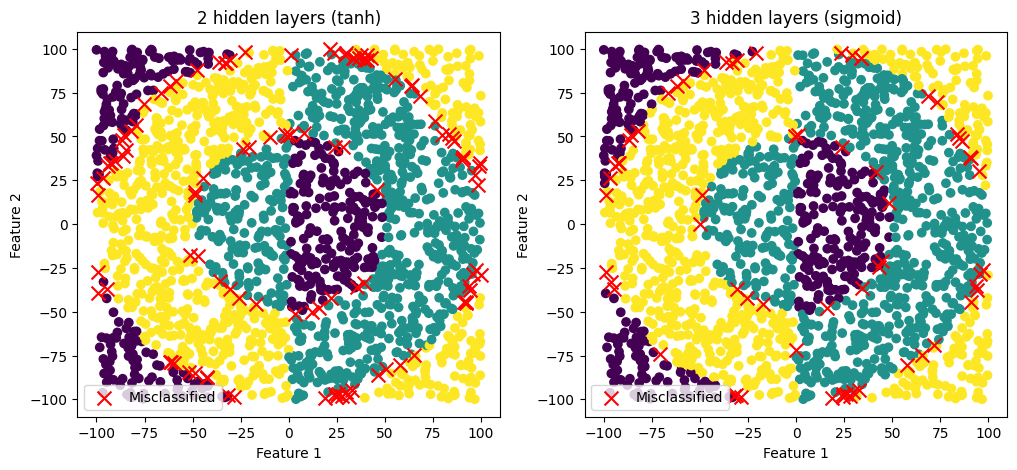

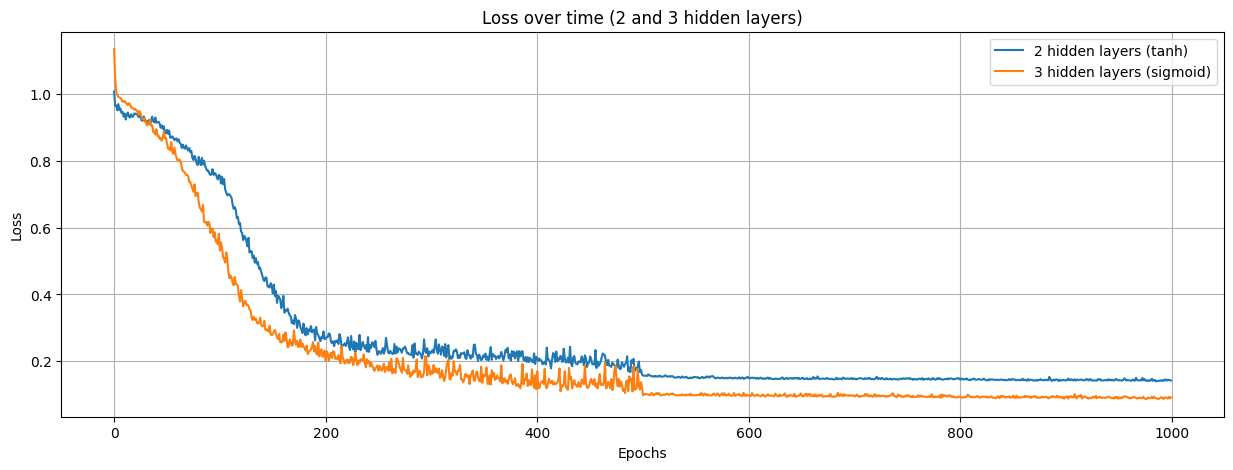

In [109]:
y_pred_rings3_best2 = nn_rings3_best2.predict(X_rings3_test)
y_pred_rings3_best3 = nn_rings3_best3.predict(X_rings3_test)
y_pred_rings3_best2 = np.argmax(y_pred_rings3_best2, axis=1).reshape(-1, 1)
y_pred_rings3_best3 = np.argmax(y_pred_rings3_best3, axis=1).reshape(-1, 1)

accuracy_best2 = accuracy_score(y_rings3_test, y_pred_rings3_best2)
accuracy_best3 = accuracy_score(y_rings3_test, y_pred_rings3_best3)

f1_score_best2 = f1_score(y_rings3_test, y_pred_rings3_best2, average='weighted')
f1_score_best3 = f1_score(y_rings3_test, y_pred_rings3_best3, average='weighted')

print(f"Accuracy for 2 hidden layers with tanh: {accuracy_best2:.4f}")
print(f"F1 score for 2 hidden layers with tanh: {f1_score_best2:.4f}")
print("")
print(f"Accuracy for 3 hidden layers with sigmoid: {accuracy_best3:.4f}")
print(f"F1 score for 3 hidden layers with sigmoid: {f1_score_best3:.4f}")

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plot_classification_results(X_rings3_test, y_rings3_test, y_pred_rings3_best2, title='2 hidden layers (tanh)')
plt.subplot(1, 2, 2)
plot_classification_results(X_rings3_test, y_rings3_test, y_pred_rings3_best3, title='3 hidden layers (sigmoid)')

history_best2 = nn_rings3_best2.model_history()
history_best3 = nn_rings3_best3.model_history()

plt.figure(figsize=(15, 5))
plt.plot(history_best2, label='2 hidden layers (tanh)')
plt.plot(history_best3, label='3 hidden layers (sigmoid)')
plt.title('Loss over time (2 and 3 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Rings5 dataset

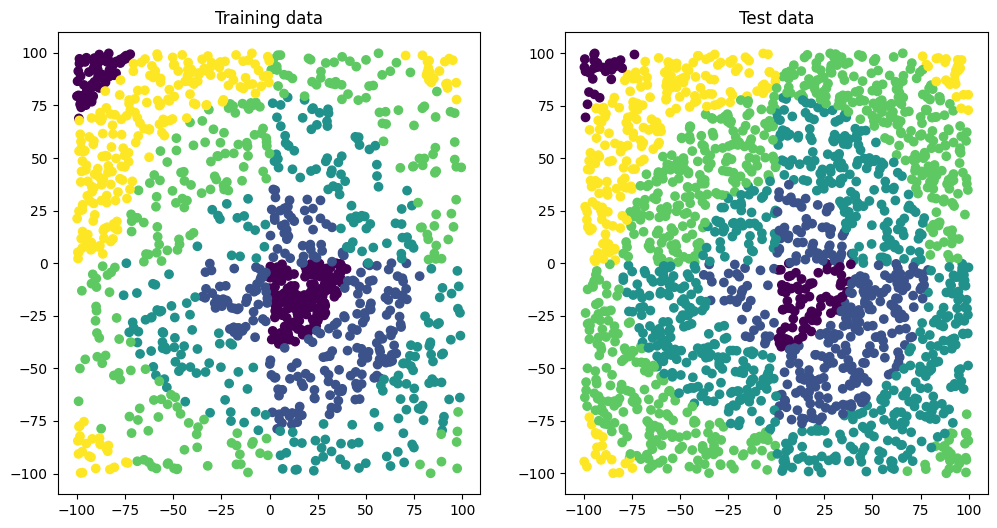

In [115]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_rings5_train[:, 0], X_rings5_train[:, 1], c=y_rings5_train, cmap='viridis')
plt.title('Training data')
plt.subplot(1, 2, 2)
plt.scatter(X_rings5_test[:, 0], X_rings5_test[:, 1], c=y_rings5_test, cmap='viridis')
plt.title('Test data')
plt.show()

In [129]:
input_size = X_rings5_train.shape[1]
output_size = np.unique(y_rings5_train).shape[0]
nn_rings5_best2 = NeuralNetwork(X_rings5_train, y_rings5_train, [input_size, 32, 32, output_size],
                                activation_fun="tanh", output_activation="softmax", loss_fun="crossentropy")
nn_rings5_best3 = NeuralNetwork(X_rings5_train, y_rings5_train, [input_size, 32, 32, 32, output_size],
                                activation_fun="sigmoid", output_activation="softmax", loss_fun="crossentropy")

In [130]:
nn_rings5_best2.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_rings5_test, y_rings5_test),
            mini_batch=True, batch_size=16, optimization="rmsprop", momentum=0, stop_condition=0)

Starting loss: 1.89


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00] , Loss:  Current: 0.1858,Best: 0.1594


Training complete. Final loss: 0.1594


In [131]:
nn_rings5_best3.train(epochs=int(1000), learning_rate=0.001, validation_data=(X_rings5_test, y_rings5_test),
            mini_batch=True, batch_size=16, optimization="rmsprop", momentum=0, stop_condition=0)

Starting loss: 1.72


Training: 100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00] , Loss:  Current: 0.2232,Best: 0.1348


Training complete. Final loss: 0.1348


Accuracy for 2 hidden layers with tanh: 0.9445
F1 score for 2 hidden layers with tanh: 0.9446

Accuracy for 3 hidden layers with sigmoid: 0.9395
F1 score for 3 hidden layers with sigmoid: 0.9396


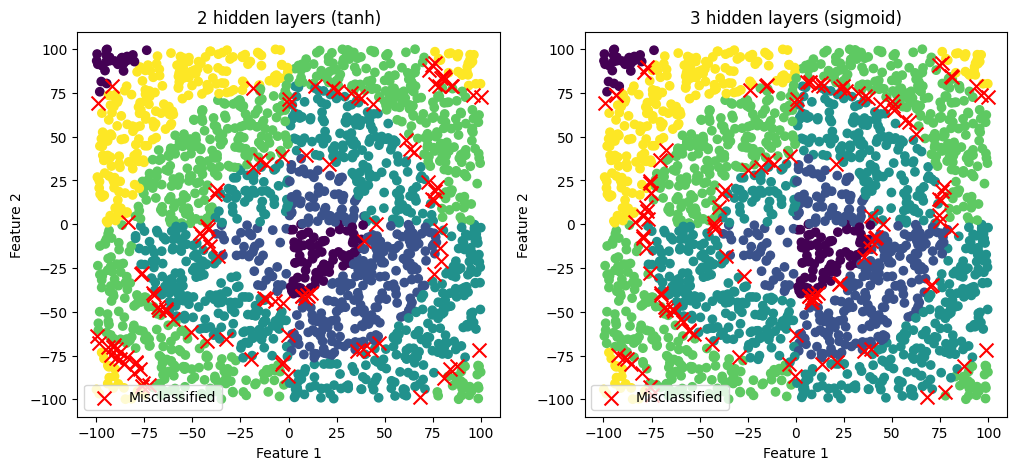

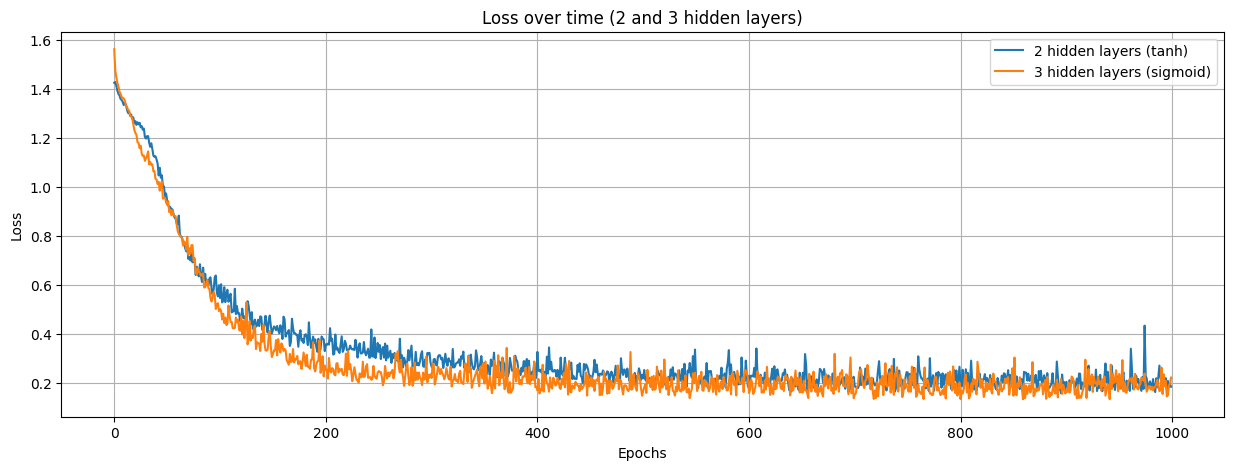

In [136]:
y_pred_rings5_best2 = nn_rings5_best2.predict(X_rings5_test)
y_pred_rings5_best3 = nn_rings5_best3.predict(X_rings5_test)
y_pred_rings5_best2 = np.argmax(y_pred_rings5_best2, axis=1).reshape(-1, 1)
y_pred_rings5_best3 = np.argmax(y_pred_rings5_best3, axis=1).reshape(-1, 1)

accuracy_best2 = accuracy_score(y_rings5_test, y_pred_rings5_best2)
accuracy_best3 = accuracy_score(y_rings5_test, y_pred_rings5_best3)
f1score_best2 = f1_score(y_rings5_test, y_pred_rings5_best2, average='weighted')
f1score_best3 = f1_score(y_rings5_test, y_pred_rings5_best3, average='weighted')

print(f"Accuracy for 2 hidden layers with tanh: {accuracy_best2:.4f}")
print(f"F1 score for 2 hidden layers with tanh: {f1score_best2:.4f}")
print()  
print(f"Accuracy for 3 hidden layers with sigmoid: {accuracy_best3:.4f}")
print(f"F1 score for 3 hidden layers with sigmoid: {f1score_best3:.4f}")

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plot_classification_results(X_rings5_test, y_rings5_test, y_pred_rings5_best2, title='2 hidden layers (tanh)')
plt.subplot(1, 2, 2)
plot_classification_results(X_rings5_test, y_rings5_test, y_pred_rings5_best3, title='3 hidden layers (sigmoid)')

history_best2 = nn_rings5_best2.model_history()
history_best3 = nn_rings5_best3.model_history()
plt.figure(figsize=(15, 5))
plt.plot(history_best2, label='2 hidden layers (tanh)')
plt.plot(history_best3, label='3 hidden layers (sigmoid)')
plt.title('Loss over time (2 and 3 hidden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()